**this version code trying to tokenize the keyword and categorized them for future analysis**
**Starting from the csv file download from 


In [124]:
# import the necessary libraries
import pandas as pd
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
import re
from sklearn.model_selection import train_test_split

In [113]:
#get the tweet data from 
df_tweets = pd.read_csv('data/trump-tweets-11-18-2019.csv')
print('total tweets', len(df_tweets))
display(df_tweets.head(20))

total tweets 12333


,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,https://t.co/Mqj5tXaDAz,11-18-2019 04:38:28,15115,41938,False,1196286528546332672
1,Twitter for iPhone,“All they do is bring up witnesses who didn’t ...,11-18-2019 03:39:38,16476,61998,False,1196271720392511489
2,Twitter for iPhone,“The Impeachment started before he even became...,11-18-2019 02:40:04,18488,75282,False,1196256729471827968
3,Twitter for iPhone,https://t.co/1Rg66Tn4uP,11-17-2019 22:57:43,16318,51690,False,1196200775560634368
4,Twitter for iPhone,https://t.co/D66PEkuX6d,11-17-2019 22:51:37,12209,38663,False,1196199239715639302
5,Twitter for iPhone,Where is the Fake Whistleblower?,11-17-2019 20:12:27,26433,123845,False,1196159184431177729
6,Twitter for iPhone,https://t.co/ru2n7i2gzu,11-17-2019 20:10:21,10062,30606,False,1196158655202299904
7,Twitter for iPhone,Republicans &amp; others must remember the Ukr...,11-17-2019 20:08:08,16915,63430,False,1196158097628303361
8,Twitter for iPhone,The Crazed Do Nothing Democrats are turning Im...,11-17-2019 20:03:44,17825,70193,False,1196156991682568193
9,Twitter for iPhone,Tell Jennifer Williams whoever that is to read...,11-17-2019 19:57:12,16943,65278,False,1196155347117002752


In [114]:

#df_tweets.describe()
df_tweets['created_at'] =  pd.to_datetime(df_tweets['created_at']).dt.date
df_tweets['trump_tweet_cnt'] =[1 if reFlag ==False else 0 for reFlag in df_tweets['is_retweet'].values]
df_tweets['trump_retweet_cnt'] =[0 if  reFlag ==False else 1 for reFlag in df_tweets['is_retweet'].values]
df_tweets.head(20)


,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,trump_tweet_cnt,trump_retweet_cnt
0,Twitter for iPhone,https://t.co/Mqj5tXaDAz,2019-11-18,15115,41938,False,1196286528546332672,1,0
1,Twitter for iPhone,“All they do is bring up witnesses who didn’t ...,2019-11-18,16476,61998,False,1196271720392511489,1,0
2,Twitter for iPhone,“The Impeachment started before he even became...,2019-11-18,18488,75282,False,1196256729471827968,1,0
3,Twitter for iPhone,https://t.co/1Rg66Tn4uP,2019-11-17,16318,51690,False,1196200775560634368,1,0
4,Twitter for iPhone,https://t.co/D66PEkuX6d,2019-11-17,12209,38663,False,1196199239715639302,1,0
5,Twitter for iPhone,Where is the Fake Whistleblower?,2019-11-17,26433,123845,False,1196159184431177729,1,0
6,Twitter for iPhone,https://t.co/ru2n7i2gzu,2019-11-17,10062,30606,False,1196158655202299904,1,0
7,Twitter for iPhone,Republicans &amp; others must remember the Ukr...,2019-11-17,16915,63430,False,1196158097628303361,1,0
8,Twitter for iPhone,The Crazed Do Nothing Democrats are turning Im...,2019-11-17,17825,70193,False,1196156991682568193,1,0
9,Twitter for iPhone,Tell Jennifer Williams whoever that is to read...,2019-11-17,16943,65278,False,1196155347117002752,1,0


In [115]:

df_tweets_cleaned = df_tweets.groupby('created_at', as_index = False).agg({
    'trump_tweet_cnt': 'sum',
    'trump_retweet_cnt': 'sum',
    'retweet_count': 'sum',
    'favorite_count': 'sum'
})
df_tweets_cleaned.head()


,created_at,trump_tweet_cnt,trump_retweet_cnt,retweet_count,favorite_count
0,2017-01-21,1,1,51350,177579
1,2017-01-22,4,0,184236,949408
2,2017-01-23,1,0,26750,177839
3,2017-01-24,4,0,86707,495813
4,2017-01-25,8,0,240014,1112361


In [116]:
#sort to display head to validate the aggregation works fine

df_tweets_cleaned= df_tweets_cleaned.sort_values('created_at',ascending=False)
df_tweets_cleaned.head()

,created_at,trump_tweet_cnt,trump_retweet_cnt,retweet_count,favorite_count
1018,2019-11-18,3,0,50079,179218
1017,2019-11-17,36,15,666343,1668991
1016,2019-11-16,14,11,414895,932464
1015,2019-11-15,19,24,733886,1313131
1014,2019-11-14,13,21,444871,988437


In [117]:
#read the ^GSPC data from file, downloaded from yahoo 
#starting date from 2017-01-21 through 2019-11-18
df_SPX = pd.read_csv('data/GSPC-2017-01-21-2019-11-18.csv')
df_SPX['Date'] = pd.to_datetime(df_SPX['Date']).dt.date
display(df_SPX.head())
display(df_SPX.describe())
#df_SPX_dn


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-23,2267.780029,2271.780029,2257.020020,2265.199951,2265.199951,3152710000
1,2017-01-24,2267.879883,2284.629883,2266.679932,2280.070068,2280.070068,3810960000
2,2017-01-25,2288.879883,2299.550049,2288.879883,2298.370117,2298.370117,3846020000
3,2017-01-26,2298.629883,2300.989990,2294.080078,2296.679932,2296.679932,3610360000
4,2017-01-27,2299.020020,2299.020020,2291.620117,2294.689941,2294.689941,3135890000


,Open,High,Low,Close,Adj Close,Volume
count,712.000000,712.000000,712.000000,712.000000,712.000000,7.120000e+02
mean,2692.130730,2703.282850,2679.795449,2692.350028,2692.350028,3.526318e+09
std,206.575691,207.733114,205.301864,206.434496,206.434496,5.899965e+08
min,2267.780029,2271.780029,2257.020020,2265.199951,2265.199951,1.349780e+09
25%,2502.142517,2509.532410,2495.712463,2506.800049,2506.800049,3.198668e+09
50%,2718.645019,2733.034912,2703.029907,2719.250000,2719.250000,3.446320e+09
75%,2858.612549,2872.877563,2850.742615,2858.719970,2858.719970,3.773572e+09
max,3117.909912,3124.169922,3112.060059,3122.030029,3122.030029,7.609010e+09


In [118]:
df_tweets_cleaned['trade_date_flag']=[1 if dt in (df_SPX['Date'].values) else 0 for dt in df_tweets_cleaned['created_at']]
df_tweets_cleaned.head(10)

,created_at,trump_tweet_cnt,trump_retweet_cnt,retweet_count,favorite_count,trade_date_flag
1018,2019-11-18,3,0,50079,179218,1
1017,2019-11-17,36,15,666343,1668991,0
1016,2019-11-16,14,11,414895,932464,0
1015,2019-11-15,19,24,733886,1313131,1
1014,2019-11-14,13,21,444871,988437,1
1013,2019-11-13,13,30,620215,861799,1
1012,2019-11-12,10,4,206848,687599,1
1011,2019-11-11,23,15,594749,1628959,1
1010,2019-11-10,18,33,734694,1231303,0
1009,2019-11-09,12,32,511615,879567,0


In [119]:
df_SPX['changepct'] = (df_SPX['Close']-df_SPX['Open']) * 100 /df_SPX['Close']
df_SPX.head()



,Date,Open,High,Low,Close,Adj Close,Volume,changepct
0,2017-01-23,2267.780029,2271.780029,2257.020020,2265.199951,2265.199951,3152710000,-0.113901
1,2017-01-24,2267.879883,2284.629883,2266.679932,2280.070068,2280.070068,3810960000,0.534641
2,2017-01-25,2288.879883,2299.550049,2288.879883,2298.370117,2298.370117,3846020000,0.412911
3,2017-01-26,2298.629883,2300.989990,2294.080078,2296.679932,2296.679932,3610360000,-0.084903
4,2017-01-27,2299.020020,2299.020020,2291.620117,2294.689941,2294.689941,3135890000,-0.188700


In [120]:
df_cbm = df_SPX.copy()
df_cbm['trump_tweet_cnt'] = [df_tweets_cleaned.loc[df_tweets_cleaned['created_at']==dt]['trump_tweet_cnt'].values[0] if dt in (df_tweets_cleaned['created_at'].values) else 0 for dt in df_SPX['Date'].values]
df_cbm['retweet_count'] = [df_tweets_cleaned.loc[df_tweets_cleaned['created_at']==dt]['retweet_count'].values[0] if dt in (df_tweets_cleaned['created_at'].values) else 0 for dt in df_SPX['Date'].values]
df_cbm['favorite_count'] = [df_tweets_cleaned.loc[df_tweets_cleaned['created_at']==dt]['favorite_count'].values[0] if dt in (df_tweets_cleaned['created_at'].values) else 0 for dt in df_SPX['Date'].values]
df_cbm.sort_values('Date',ascending=False).head()

,Date,Open,High,Low,Close,Adj Close,Volume,changepct,trump_tweet_cnt,retweet_count,favorite_count
711,2019-11-18,3117.909912,3124.169922,3112.060059,3122.030029,3122.030029,3436690000,0.131969,3,50079,179218
710,2019-11-15,3107.919922,3120.459961,3104.600098,3120.459961,3120.459961,3335650000,0.401865,19,733886,1313131
709,2019-11-14,3090.750000,3098.199951,3083.260010,3096.629883,3096.629883,3276070000,0.189880,13,444871,988437
708,2019-11-13,3084.179932,3098.060059,3078.800049,3094.040039,3094.040039,3509280000,0.318681,13,620215,861799
707,2019-11-12,3089.280029,3102.610107,3084.729980,3091.840088,3091.840088,3466010000,0.082800,10,206848,687599


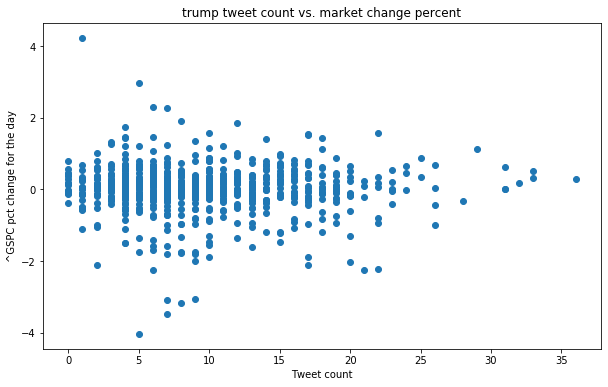

In [121]:
plt.figure(figsize=(10,6))
plt.scatter(df_cbm['trump_tweet_cnt'], df_cbm['changepct'])
plt.title('trump tweet count vs. market change percent')
plt.xlabel('Tweet count')
plt.ylabel('^GSPC pct change for the day')
plt.show()

In [130]:
#df_cbm = df_cbm.drop(['Date','Open','High','Low','Close','Adj Close', 'Volume'],axis=1)
display(df_cbm.head())
display(df_cbm.describe())


,changepct,trump_tweet_cnt,retweet_count,favorite_count
0,-0.113901,1,26750,177839
1,0.534641,4,86707,495813
2,0.412911,8,240014,1112361
3,-0.084903,11,194173,970602
4,-0.188700,7,168114,841537


,changepct,trump_tweet_cnt,retweet_count,favorite_count
count,712.000000,712.000000,712.000000,7.120000e+02
mean,0.006311,9.578652,221297.696629,8.088722e+05
std,0.698068,6.115576,146463.511284,4.671912e+05
min,-4.029834,0.000000,0.000000,0.000000e+00
25%,-0.216910,5.000000,111632.250000,4.550842e+05
50%,0.045234,9.000000,195735.500000,7.350075e+05
75%,0.342885,13.000000,292709.250000,1.082979e+06
max,4.237948,36.000000,789785.000000,2.639593e+06
